In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

d:\python\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Filtering for Pakistan

In [3]:
df_PK = df[df['job_country']=='Pakistan'].copy()

In [5]:
# Number of skills for earch job title

df_skills = df_PK.explode('job_skills')

df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by='skill_count', ascending=False, inplace = True)

In [17]:
# Job Titles

job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles)

job_titles = job_titles[2:5]

## Count of Top Skills in Job Postings

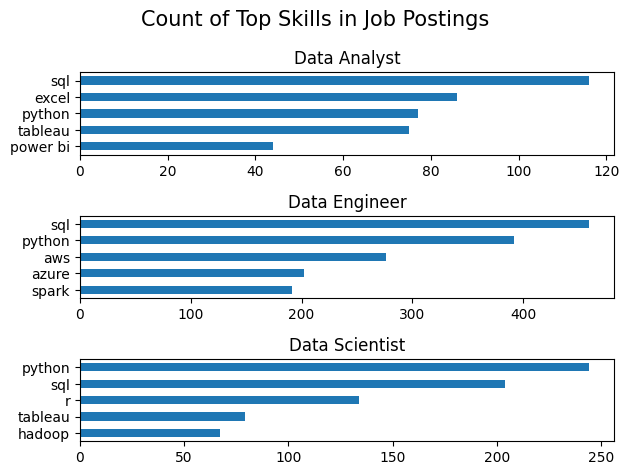

In [18]:
fig, ax = plt.subplots(len(job_titles),1)

for i, title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']==title].head(5).copy()
    df_plot.plot(kind='barh',x='job_skills',y='skill_count', title=title, ax=ax[i], legend=False)
    ax[i].set_ylabel('')
    ax[i].invert_yaxis()

fig.suptitle('Count of Top Skills in Job Postings', fontsize=15)
plt.tight_layout()

In [21]:
# Count of Jobs by Job Title

df_job_title_count = df_PK['job_title_short'].value_counts().reset_index(name='total_jobs')

# Calculating Skill percentage in a Job

df_skills_perc = df_skills_count.merge(df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skill_percent'] = (df_skills_perc['skill_count']/df_skills_perc['total_jobs']) * 100

df_skills_perc

,job_skills,job_title_short,skill_count,total_jobs,skill_percent
0,sql,Data Engineer,459,638,71.943574
1,python,Data Engineer,392,638,61.442006
2,aws,Data Engineer,276,638,43.260188
3,python,Data Scientist,244,370,65.945946
4,sql,Data Scientist,204,370,55.135135
...,...,...,...,...,...
869,yarn,Senior Data Engineer,1,160,0.625000
870,zoom,Data Engineer,1,638,0.156740
871,zoom,Machine Learning Engineer,1,202,0.495050
872,arch,Data Scientist,1,370,0.270270


## Likelihood of Skills in Job Postings

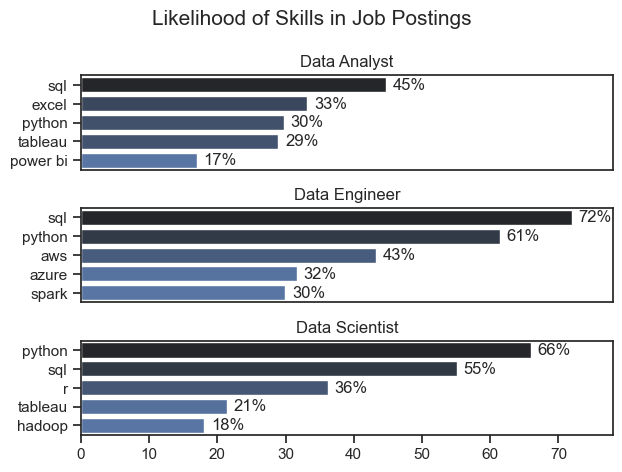

In [23]:
sns.set_theme(style='ticks')
fig, ax = plt.subplots(len(job_titles),1)

for i, title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short']==title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y= 'job_skills', ax=ax[i], hue='skill_percent', palette = 'dark:b_r')
    ax[i].get_legend().remove()
    ax[i].set_title(title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,78)


    for idx, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1,idx, f'{v:.0f}%', va= 'center')
    
    if i != len(job_titles)-1:
        ax[i].set_xticks([])
    

fig.suptitle('Likelihood of Skills in Job Postings', fontsize=15)
plt.tight_layout()